# Low-rank Tensor Regression

Tensor regression is available in the module `tensorly.regression`.

Given a series of $N$ tensor samples/observations, $\tilde X_i, i={1, \cdots, N}$, and corresponding labels $y_i, i={1, \cdots, N}$, we want to find the weight tensor $\tilde W$ such that, for each $i={1, \cdots, N}$:

$$
   y_i = \langle \tilde X_i, \tilde W \rangle
$$

We additionally impose that $\tilde W$ be a rank-r CP decomposition (Kruskal regression) or a rank $(r_1, \cdots, r_N)$-Tucker decomposition (Tucker regression).

TensorLy implements both types of tensor regression as scikit-learn-like estimators.

For instance, Krusal regression is available through the $tensorly.regression.KruskalRegression$ object. This implements a fit method that takes as parameters $X$, the data tensor which first dimension is the number of samples, and $y$, the corresponding vector of labels.

Given a set of testing samples, you can use the predict method to obtain the corresponding predictions from the model.



In [1]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.regression import CPRegressor
import tensorly.backend as T
import tensorly as tl

#show figures in the notebook
%matplotlib inline

In [2]:
# Parameter of the experiment
image_height = 25
image_width = 25

# fix the random seed for reproducibility
rng = tl.check_random_state(1) 

# Generate a random tensor
X = T.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))

Generate the original image

In [3]:
weight_img = gen_image(region='swiss', image_height=image_height, image_width=image_width)
weight_img = T.tensor(weight_img)

The true labels is obtained by taking the product between the true regression weights and the input tensors

In [4]:
y = T.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

## Let's view the true regression weight 

Text(0.5, 1.0, 'True regression weights')

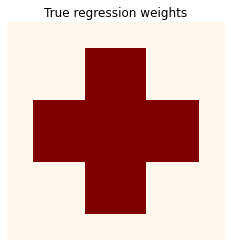

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('True regression weights')

## Tensor regression 

### Create a tensor Regressor estimator

In [6]:
estimator = CPRegressor(weight_rank=2, tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)

### Fit the estimator to the data

In [7]:
estimator.fit(X, y)

### Predict the labels given input tensors

In [8]:
estimator.predict(X)

array([ 1.25733698e+00, -2.82764357e+00, -2.06880054e+01, -4.52973146e+00,
       -1.65390569e+01, -2.85602047e+01,  1.06871375e+01,  3.31603213e+01,
       -3.91138731e+00, -2.81845061e+01,  1.32203644e+01, -4.02337480e+00,
       -2.97070761e+00,  3.22711792e+01,  6.50033511e+00, -5.60007107e+00,
        3.91175441e+00,  2.80381672e+01,  1.25563311e+01,  8.20932617e+00,
       -2.29539318e+01,  1.14984252e+01,  1.32471886e+01,  1.09914640e+01,
       -1.79590543e+01, -9.14120596e-03,  2.47594561e+01, -2.01632327e+01,
        2.31481725e-02, -1.50853607e+01,  9.07255715e+00, -2.36972115e+01,
       -6.78489509e+00, -1.25362816e+01, -5.01508949e+00, -7.85710223e+00,
       -2.24760125e+01, -1.91820826e+01,  2.30171417e+01, -2.01226350e+01,
       -1.98938483e+01,  3.66573262e+00,  7.82953683e+00,  5.58285027e+00,
       -5.20960713e+00, -6.78431014e+00, -1.54119488e+01, -1.79192335e+01,
        7.00906425e+00, -1.02106941e+01,  2.07327226e+01, -4.24881642e+00,
        1.28831057e+01, -

### Visualise the learned weights

Text(0.5, 1.0, 'Learned regression weights')

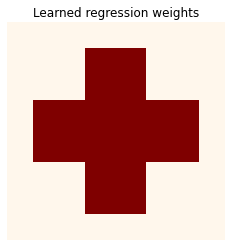

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(T.to_numpy(estimator.weight_tensor_), cmap=plt.cm.OrRd, interpolation='nearest')
ax.set_axis_off()
ax.set_title('Learned regression weights')

Wait! Weren't the learned weights supposed to be a low rank tensor in the Krusakl form!?

They are! We simply plot the full tensor corresponding to the learned decomposition. You can access the decomposed form as follows:

In [10]:
weights, factors = estimator.cp_weight_